# Análise de Dados Abertos


In [200]:
import pandas as pd
import numpy as np
from babel.numbers import format_compact_currency
import matplotlib.pyplot as plt
import locale
import tabulate

locale.setlocale(locale.LC_ALL, "pt_BR")
plt.style.use("bmh")
excelsheet = "../data/criptoativos_dados_abertos_07082023.xls"

# Carrega a planilha excel
with pd.ExcelFile(excelsheet) as xls:
    df1 = pd.read_excel(
        xls,
        "Relatorio1",
        skiprows=9,
        decimal=",",
        parse_dates=[0],
        date_format="%B de %Y",
        usecols=[0, 3, 6, 7, 8],
    )
    df2 = pd.read_excel(
        xls,
        "Relatorio2",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        decimal=".",
    )
    df3 = pd.read_excel(
        xls,
        "Relatório3",
        skiprows=5,
        parse_dates=[0],
        date_format="%B de %Y",
        header=[0, 1],
    )
    df4 = pd.read_excel(
        xls,
        "Relatorio4",
        skiprows=13,
        decimal=",",
        parse_dates=[1],
        date_format="%B de %Y",
    )


# Utilitários
def format_cols(data):
    return data.apply(
        lambda x: format_compact_currency(
            x, currency="BRL", locale="pt_BR", fraction_digits=2
        )
    )


cryptos = []
for i in df4["CRIPTOATIVO"]:
    if i not in cryptos:
        cryptos.append(i)

most_popular = ["BTC", "ETH", "USDT", "BNB", "XRP"]
# "USDC", "ADA", "DOGE", "SOL", "TRX"]

## Total de Valores Declarados por Ano


Text(0.5, 1.0, 'Valores Declarados (em bilhões)')

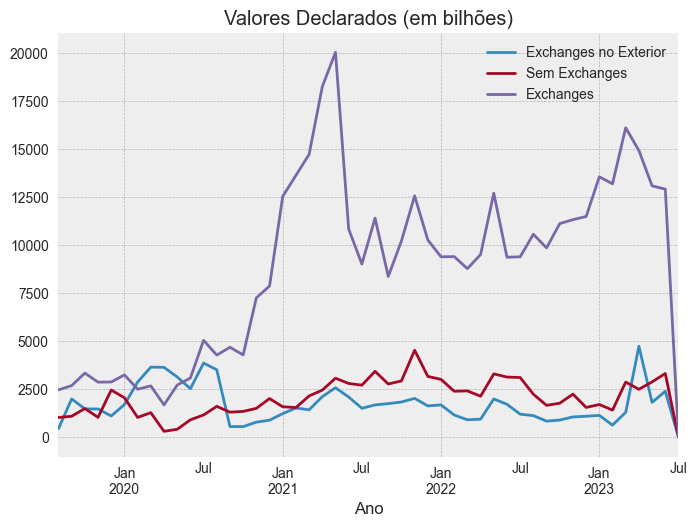

In [201]:
# Renderiza Relatório1
df1 = df1.rename(
    columns={
        "Unnamed: 0": "Ano",
        "Subtotal": "Exchanges no Exterior",
        "Subtotal.1": "Sem Exchanges",
        "Somente PJ": "Exchanges",
        "Unnamed: 8": "Total",
    }
)

# for i in df1.columns:
#     if df1[i].dtype == np.float64:
#         df1[i] = df1[i].apply(lambda x: x * 1_000_000)

df1.plot(x=df1.columns[0], y=df1.columns[1:4])
plt.title("Valores Declarados (em bilhões)")

## Quantidade de CPF/CNPJ Únicos


In [202]:
# Renderiza Relatório2
df2_new = df2.groupby(pd.Grouper(key=df2.columns[0], freq="Y")).sum()
df2_new

,CNPJ,CPF
MÊS/ANO,,
2019-12-31,12121,680054
2020-12-31,37611,1500287
2021-12-31,78290,6030838
2022-12-31,406008,11868506
2023-12-31,409524,11432616


## Operações por gênero


<Axes: title={'center': 'Masculino'}, xlabel='Número de Operações (%)', ylabel='Valor das Operações (%)'>

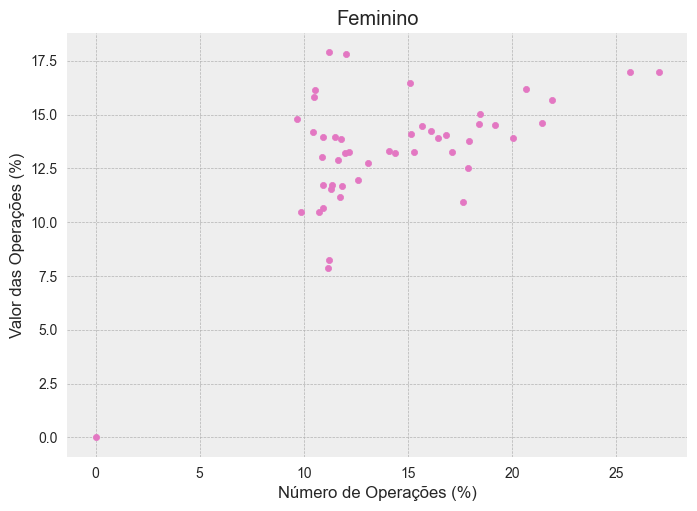

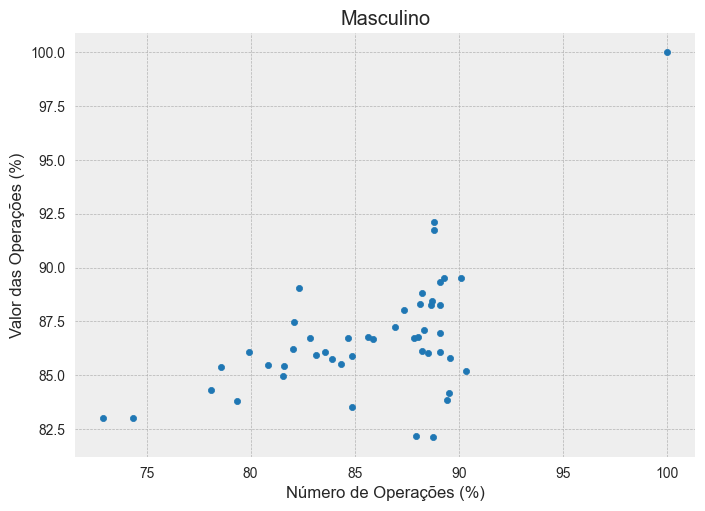

In [203]:
# Renderiza Relatório3, parte 1
# Não vai ser possível unir os dados, já que são porcentagens!
# Apresenta a participação de cada gênero em relação ao número de operações e aos valores declarados.
xlabel = "Número de Operações (%)"
ylabel = "Valor das Operações (%)"

df3.plot(
    kind="scatter",
    x=df3.columns[1],
    y=df3.columns[3],
    c="tab:pink",
    title="Feminino",
    xlabel=xlabel,
    ylabel=ylabel,
)

df3.plot(
    kind="scatter",
    x=df3.columns[2],
    y=df3.columns[4],
    c="tab:blue",
    title="Masculino",
    xlabel=xlabel,
    ylabel=ylabel,
)

## Criptoativos Declarados


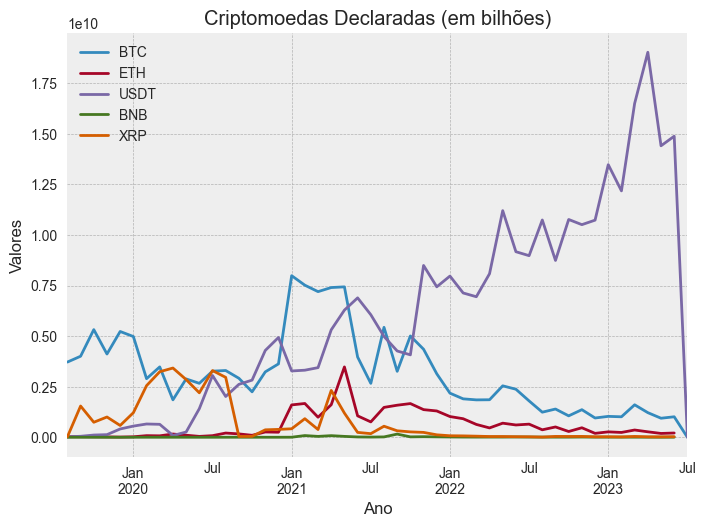

In [209]:
# Renderiza Relatório 4
# https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum
# https://pbpython.com/pandas-grouper-agg.html
df4_new = df4.groupby(["CRIPTOATIVO", pd.Grouper(key="MÊS/ANO", freq="M")])[
    "VALOR TOTAL DAS OPERAÇÕES"
].sum()

for i in most_popular:
    df4_new[i].plot(label=i, title="Criptomoedas Declaradas (em bilhões)")

plt.xlabel("Ano")
plt.ylabel("Valores")
plt.legend()